In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sci
import matplotlib.pyplot as plt

In [88]:
#CARGA DE DATOS
df=pd.read_csv("epa-sea-level.csv")
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


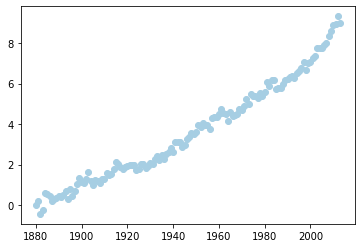

In [89]:
plt.scatter(x="Year",y="CSIRO Adjusted Sea Level" ,data=df)

In [90]:
res = sci.linregress(x=df["Year"], y=df["CSIRO Adjusted Sea Level"])

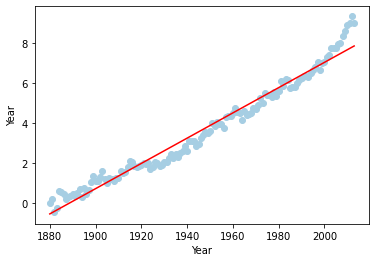

In [91]:
#Regresion de todos los datos
res = sci.linregress(x=df["Year"], y=df["CSIRO Adjusted Sea Level"])
a=res.slope
b=res.intercept
sns.lineplot(x=df["Year"], y=a*df["Year"]+b, color="red")
plt.scatter(x="Year",y="CSIRO Adjusted Sea Level" ,data=df)

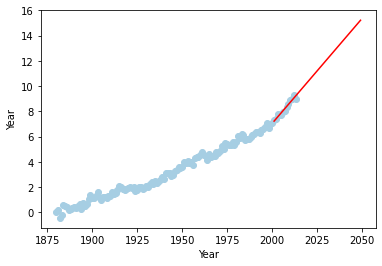

In [93]:
#Regresion con datos de 2000 en adelante
res2 = sci.linregress(x=df.loc[df["Year"]>2000]["Year"],y=df.loc[df["Year"]>2000]["CSIRO Adjusted Sea Level"])
a2=res2.slope
b2=res2.intercept

df = df.append([{"Year": y} for y in range(df["Year"].max() + 1, 2050)])

sns.lineplot(x=df.loc[df["Year"]>2000]["Year"], y=a2*df.loc[df["Year"]>2000]["Year"] + b2, color="red")
plt.scatter(x="Year",y="CSIRO Adjusted Sea Level" ,data=df)

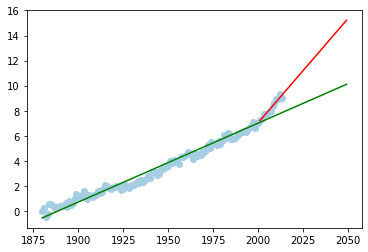

In [104]:
plt.plot(df.loc[df["Year"]>2000]["Year"], a2*df.loc[df["Year"]>2000]["Year"] + b2,c="r")
plt.scatter(x="Year",y="CSIRO Adjusted Sea Level" ,data=df)
plt.plot(df["Year"], a*df["Year"]+b, c="g")

In [99]:
# Codigo FINAL PARA finalizar
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sci


def draw_plot():
  df=pd.read_csv("epa-sea-level.csv")
  res = sci.linregress(x=df["Year"], y=df["CSIRO Adjusted Sea Level"])
  a=res.slope
  b=res.intercept
  res2 = sci.linregress(x=df.loc[df["Year"]>2000]["Year"],y=df.loc[df["Year"]>2000]["CSIRO Adjusted Sea Level"])
  a2=res2.slope
  b2=res2.intercept
  plt.plot(df.loc[df["Year"]>2000]["Year"], a2*df.loc[df["Year"]>2000]["Year"] + b2,c="r")
  plt.scatter(x="Year",y="CSIRO Adjusted Sea Level" ,data=df)
  plt.plot(df["Year"], a*df["Year"]+b, c="g")
  return plt.gca()

0.1665008218406594